## NLP Basic Assignment

### Import Module

In [1]:
import pandas as pd
import re

### Load Data

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Cleansing Data

In [4]:
def remove_html(text):
    text = re.sub(r"http://.+\.com" , "" , text)
    text = re.sub(r"http://\S+" , "" , text)
    text = re.sub(r"http://[A-Za-z0-9./?= *&:-]+" , "" , text)
    text = re.sub(r"http.+\.com" , "" , text)
    text = re.sub(r"http//[A-Za-z0-9./?= *&:-]+" , "" ,text)
    text = re.sub(r"www[.A-Za-z0-9/+-]+" , "" , text)
    return text

In [5]:
def remove_mails(text):
    text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+(\.[a-zA-Z]{2,5})" , "" , text)
    return text

In [6]:
spam['v2'] = spam['v2'].str.lower()
spam["v2"] = spam["v2"].apply(remove_html)
spam["v2"] = spam["v2"].apply(remove_mails)

In [7]:
spam.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


#### Target Encoding

In [8]:
spam.v1 = spam.v1.replace(['ham','spam'],[0,1])
spam

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


#### Remove duplicates

In [9]:
spam.drop_duplicates(subset=['v2'], inplace=True)
len(spam)

5168

### Tokenizing

- 구두점이나 특수 문자를 단순 제외해서는 안된다. corpus에 대한 정제 작업을 진행하다보면, 구두점도 하나의 token으로 분류 하기도하고 단어 자체에 구두점을 갖고 있는 경우도 있습니다.
- 줄임말과 단어 내에 띄어쓰기가 있는 경우, 아포스트로피는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를 들어 we're 같은 경우 re를 접어(clitic)이라고도 합니다. 토큰화 작업에서는 이러한 단어를 하나로 인식할 수 있는 능력도 가져야 합니다.
- 여러개의 tokenizer를 활용하여 성능을 비교.

#### spacy

In [11]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

parser = English()

punctuations = string.punctuation

spacy_en = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
    sptokens = parser(sentence)
    return sptokens

In [12]:
### BertTokenizer
from transformers import BertTokenizer
Bert_tokenizer = BertTokenizer.from_pretrained('bert-large-cased')

### nltk
import nltk
from nltk.tokenize import (word_tokenize, 
                           WordPunctTokenizer, 
                           TreebankWordTokenizer)

In [13]:
spam['v2'].iloc[9]

'had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030'

In [14]:
wt = word_tokenize(spam['v2'].iloc[9])
wpt = WordPunctTokenizer().tokenize(spam['v2'].iloc[9])
tbwt = TreebankWordTokenizer().tokenize(spam['v2'].iloc[9])
bt = Bert_tokenizer.tokenize(spam['v2'].iloc[9])
sp = spacy_tokenizer(spam['v2'].iloc[9])

data = [wt, wpt, tbwt, bt, sp]

df = pd.DataFrame(data, index = ['word_tokenize', 'WordPunctTokenizer', 'TreebankWordTokenizer',
                                'Bert_tokenizer', 'Spacy_tokenizer'])
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
word_tokenize,had,your,mobile,11,months,or,more,?,u,r,...,co,free,on,08002986030,None,None,None,None,None,None
WordPunctTokenizer,had,your,mobile,11,months,or,more,?,u,r,...,co,free,on,08002986030,None,None,None,None,None,None
TreebankWordTokenizer,had,your,mobile,11,months,or,more,?,u,r,...,co,free,on,08002986030,None,None,None,None,None,None
Bert_tokenizer,had,your,mobile,11,months,or,more,?,u,r,...,update,co,free,on,08,##00,##29,##86,##0,##30
Spacy_tokenizer,had,your,mobile,11,months,or,more,?,u,r,...,co,free,on,08002986030,None,None,None,None,None,None


In [15]:
spam['v2'].iloc[4]

"nah i don't think he goes to usf, he lives around here though"

In [16]:
wt = word_tokenize(spam['v2'].iloc[4])
wpt = WordPunctTokenizer().tokenize(spam['v2'].iloc[4])
tbwt = TreebankWordTokenizer().tokenize(spam['v2'].iloc[4])
bt = Bert_tokenizer.tokenize(spam['v2'].iloc[4])
sp = spacy_tokenizer(spam['v2'].iloc[4])

data = [wt, wpt, tbwt, bt, sp]

df = pd.DataFrame(data, index = ['word_tokenize', 'WordPunctTokenizer', 'TreebankWordTokenizer',
                                'Bert_tokenizer', 'Spacy_tokenizer'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
word_tokenize,nah,i,do,n't,think,he,goes,to,usf,",",he,lives,around,here,though,None,None,None
WordPunctTokenizer,nah,i,don,',t,think,he,goes,to,usf,",",he,lives,around,here,though,None,None
TreebankWordTokenizer,nah,i,do,n't,think,he,goes,to,usf,",",he,lives,around,here,though,None,None,None
Bert_tokenizer,na,##h,i,don,',t,think,he,goes,to,us,##f,",",he,lives,around,here,though
Spacy_tokenizer,nah,i,do,n't,think,he,goes,to,usf,",",he,lives,around,here,though,None,None,None


- 특수문자와 불용어를 제거하고 실행하여 각 tokenizer마다 큰 차이는 보이지 않지만 Bert_tokenizer같은 경우 'usf'라는 단어를 'us'로 나누어 버렸고 spacy의 경우 cleansing을 하면서 사라진 자리를 그대로 공백으로 두는것 같았다. spacy를 선택했다.

### Stemming & Lemmatization


-  어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 

- 표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미를 갖습니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다.

In [17]:
def spacy_lemmitizer(sentence):
    sptokens = parser(sentence)
    sptokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sptokens]
    return sptokens

In [18]:
from nltk.stem import (PorterStemmer,
                       LancasterStemmer,
                       WordNetLemmatizer)

In [19]:
PS = PorterStemmer()
LS = LancasterStemmer()
NL = WordNetLemmatizer()

In [20]:
words = spacy_tokenizer(spam['v2'].iloc[10])
words

i'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? i've cried enough today.

In [21]:
PS_S = [PS.stem(word.text) for word in words]
LS_S = [LS.stem(word.text) for word in words]
NL_L = [NL.lemmatize(word.text) for word in words]
SP_L = spacy_lemmitizer(spam['v2'].iloc[10])

data = [words, PS_S, LS_S, NL_L, SP_L]

df = pd.DataFrame(data, index = ['words', 'PorterStemmer', 'LancasterStemmer', 'WordNetLemmatizer', 'SpacyLemmatizer'])
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
words,i,'m,gon,na,be,home,soon,and,i,do,...,tonight,",",k,?,i,'ve,cried,enough,today,.
PorterStemmer,i,'m,gon,na,be,home,soon,and,i,do,...,tonight,",",k,?,i,'ve,cri,enough,today,.
LancasterStemmer,i,'m,gon,na,be,hom,soon,and,i,do,...,tonight,",",k,?,i,'ve,cri,enough,today,.
WordNetLemmatizer,i,'m,gon,na,be,home,soon,and,i,do,...,tonight,",",k,?,i,'ve,cried,enough,today,.
SpacyLemmatizer,i,be,go,to,be,home,soon,and,i,do,...,tonight,",",k,?,i,have,cried,enough,today,.


- SpacyLemmatizer만 'am'의 원래 형태인 'be'를 나타낸 것을 확인.
- WordNetLemmatizer, WordNetLemmatizer, SpacyLemmatizer 과거형 동사를 분리하지 못함.
- 각각 다른 결과를 보여줬지만 가장 성능이 좋아보이는 SpacyLemmatizer를 선택.

In [22]:
extra = ["txt","ltgt", 'www']

def spacy_text(text):
    tokenized_text = []
    text = re.sub('[^a-zA-Z]'," ", text)
    tokens = list(parser(text))
    for token in tokens:
        token = token.lemma_
        if token in extra:
            continue
        if token == "-PRON-":
            continue
        if token in STOP_WORDS:
            continue
        tokenized_text.append(token)
    return tokenized_text

In [23]:
spam['lemmatizing'] = spam['v2'].apply(spacy_text)

### Frequnecy

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv_spam = CountVectorizer(max_features = 500, stop_words= 'english', lowercase = False)
cv_ham = CountVectorizer(max_features = 500, stop_words = 'english', lowercase = False) 

In [25]:
ham_tokens = sum(spam[spam.v1 == 0]['lemmatizing'], [])
spam_tokens = sum(spam[spam.v1 == 1]['lemmatizing'], [])

tdm_ham = cv_ham.fit_transform(ham_tokens)
tdm_spam = cv_spam.fit_transform(spam_tokens)

##### ham의 빈도수

In [26]:
frequency_ham = pd.DataFrame({'token' : cv_ham.get_feature_names(),
                             'frequency' : tdm_ham.sum(axis = 0).flat})
frequency_ham.sort_values('frequency', ascending=False).head(20)

,token,frequency
163,gt,288
248,lt,287
301,ok,255
159,got,239
214,know,225
231,like,222
157,good,215
67,come,212
450,ur,198
427,time,192



##### spam 빈도수

In [27]:
frequency_spam = pd.DataFrame({'token' : cv_spam.get_feature_names(),
                             'frequency' : tdm_spam.sum(axis = 0).flat})
frequency_spam.sort_values('frequency', ascending=False).head(20)

,token,frequency
140,free,197
449,ur,119
396,stop,114
252,mobile,111
418,text,108
344,reply,96
60,claim,96
322,prize,82
49,cash,65
273,new,64


- ham의 token의 빈도수를 보면 일상 단어들이 많은것을 볼 수 있다. ex) 'gt', 'lt', 'just', 'ok', 'got', 'know'
- spam의 token의 빈도수를 보면 일과 관련된 단어들이 많을것을 볼 수 있다. ex) 'free', 'txt', 'ur', 'stop', 'mobile'
- 또한 'ur'이라는 단어는 겹치게 많이 나온것을 확인할 수 있다.


## Embedding


- 사람이 쓰는 자연어를 기계가 이해할 수 있도록 숫자의 나열인 “벡터”로 바꾸는 결과와 과정



### Word2Vec

- 한 단어의 주변 단어를 통해 그 단어의 의미를 파악

#### skipgram

In [28]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

spam_model = Word2Vec([spam_tokens], size = 100, sg = 1, window = 5,
                     min_count = 2, iter = 100)
print(spam_model)

Word2Vec(vocab=945, size=100, alpha=0.025)


- txt와 같이 나올만한 단어들이 많음

In [29]:
ham_model = Word2Vec([ham_tokens], size = 100, sg = 1, window = 5,
                     min_count = 2, iter = 100)
print(ham_model)

Word2Vec(vocab=2765, size=100, alpha=0.025)


In [30]:
spam_model.most_similar('free')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/3058901409.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  spam_model.most_similar('free')


[('oranges', 0.4142019748687744),
 ('gr', 0.38719624280929565),
 ('cool', 0.37439221143722534),
 ('mobilesdirect', 0.3741348087787628),
 ('plus', 0.3647654056549072),
 ('nokia', 0.3641667366027832),
 ('linerental', 0.36221253871917725),
 ('minutes', 0.35623639822006226),
 ('  ', 0.3533686697483063),
 ('subpoly', 0.34937140345573425)]

In [31]:
spam_model.most_similar('text')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/3729782683.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  spam_model.most_similar('text')


[('goal', 0.35677918791770935),
 ('inclusive', 0.3475152254104614),
 ('man', 0.34253060817718506),
 ('home', 0.34034720063209534),
 ('wet', 0.33351123332977295),
 ('lonely', 0.32818055152893066),
 ('mad', 0.32357168197631836),
 ('satisfy', 0.3217781186103821),
 ('randy', 0.32099679112434387),
 ('yer', 0.3200129568576813)]

In [32]:
ham_model.most_similar('ok')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/500094078.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  ham_model.most_similar('ok')


[('innings', 0.43396395444869995),
 ('bat', 0.40890952944755554),
 ('prob', 0.3941284120082855),
 ('izzit', 0.3922695219516754),
 ('audrey', 0.37945735454559326),
 ('aiyar', 0.37536436319351196),
 ('chasing', 0.37339502573013306),
 ('cancel', 0.3708826005458832),
 ('brothas', 0.36470556259155273),
 ('taking', 0.36175644397735596)]

In [33]:
ham_model.most_similar('know')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/4223556198.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  ham_model.most_similar('know')


[('let', 0.4330298602581024),
 ('cleaning', 0.3829697370529175),
 ('constantly', 0.37818634510040283),
 ('thanksgiving', 0.3689887523651123),
 ('control', 0.36601343750953674),
 ('hella', 0.36581510305404663),
 ('force', 0.36160343885421753),
 ('definitely', 0.354955792427063),
 ('stops', 0.3503892421722412),
 ('anthony', 0.3465135991573334)]

#### C-Bow

In [34]:
spam_model2 = Word2Vec([spam_tokens], size = 100, sg = 0, window = 5,
                     min_count = 2, iter = 100)
print(spam_model)

Word2Vec(vocab=945, size=100, alpha=0.025)


In [35]:
ham_model2 = Word2Vec([ham_tokens], size = 100, sg = 0, window = 5,
                     min_count = 2, iter = 100)
print(ham_model)

Word2Vec(vocab=2765, size=100, alpha=0.025)


In [36]:
spam_model2.most_similar('free')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/2450939639.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  spam_model2.most_similar('free')


[('yer', 0.6336570978164673),
 ('update', 0.6292892694473267),
 ('simply', 0.6032298803329468),
 ('oranges', 0.5926620960235596),
 ('mobile', 0.5780931711196899),
 ('minutes', 0.5756504535675049),
 ('replying', 0.5668193101882935),
 ('game', 0.5562026500701904),
 ('bluetooth', 0.5534794926643372),
 ('movie', 0.5533292293548584)]

In [37]:
spam_model2.most_similar('text')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/2009749403.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  spam_model2.most_similar('text')


[('pls', 0.6690726280212402),
 ('msgs', 0.6323328018188477),
 ('login', 0.6323280930519104),
 ('ok', 0.6297597289085388),
 ('inclusive', 0.6264194250106812),
 ('replying', 0.6147372126579285),
 ('password', 0.6123297214508057),
 ('visionsms', 0.588495671749115),
 ('qxj', 0.5640511512756348),
 ('callback', 0.5635822415351868)]

In [38]:
ham_model2.most_similar('ok')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/4151333124.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  ham_model2.most_similar('ok')


[('nic', 0.7334831357002258),
 ('innings', 0.673470675945282),
 ('busy', 0.6648132801055908),
 ('wanna', 0.6625434160232544),
 ('wana', 0.6579192280769348),
 ('purse', 0.6498619914054871),
 ('yar', 0.6445363163948059),
 ('audrey', 0.6440944671630859),
 ('forgiven', 0.6364238858222961),
 ('drink', 0.6287696361541748)]

#### TSNE를 이용한 EDA

In [39]:
vocab = list(spam_model.wv.vocab)
X = spam_model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:400,:])

df = pd.DataFrame(X_tsne, index=vocab[:400], columns=['x', 'y'])
df.shape

945
[-0.3060471   0.07105444 -0.30138627  0.07230991 -0.24789193  0.4410116
 -0.29670638 -0.23075731 -0.01322169  0.13094924]


/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_5357/3267258866.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = spam_model[vocab]


(400, 2)

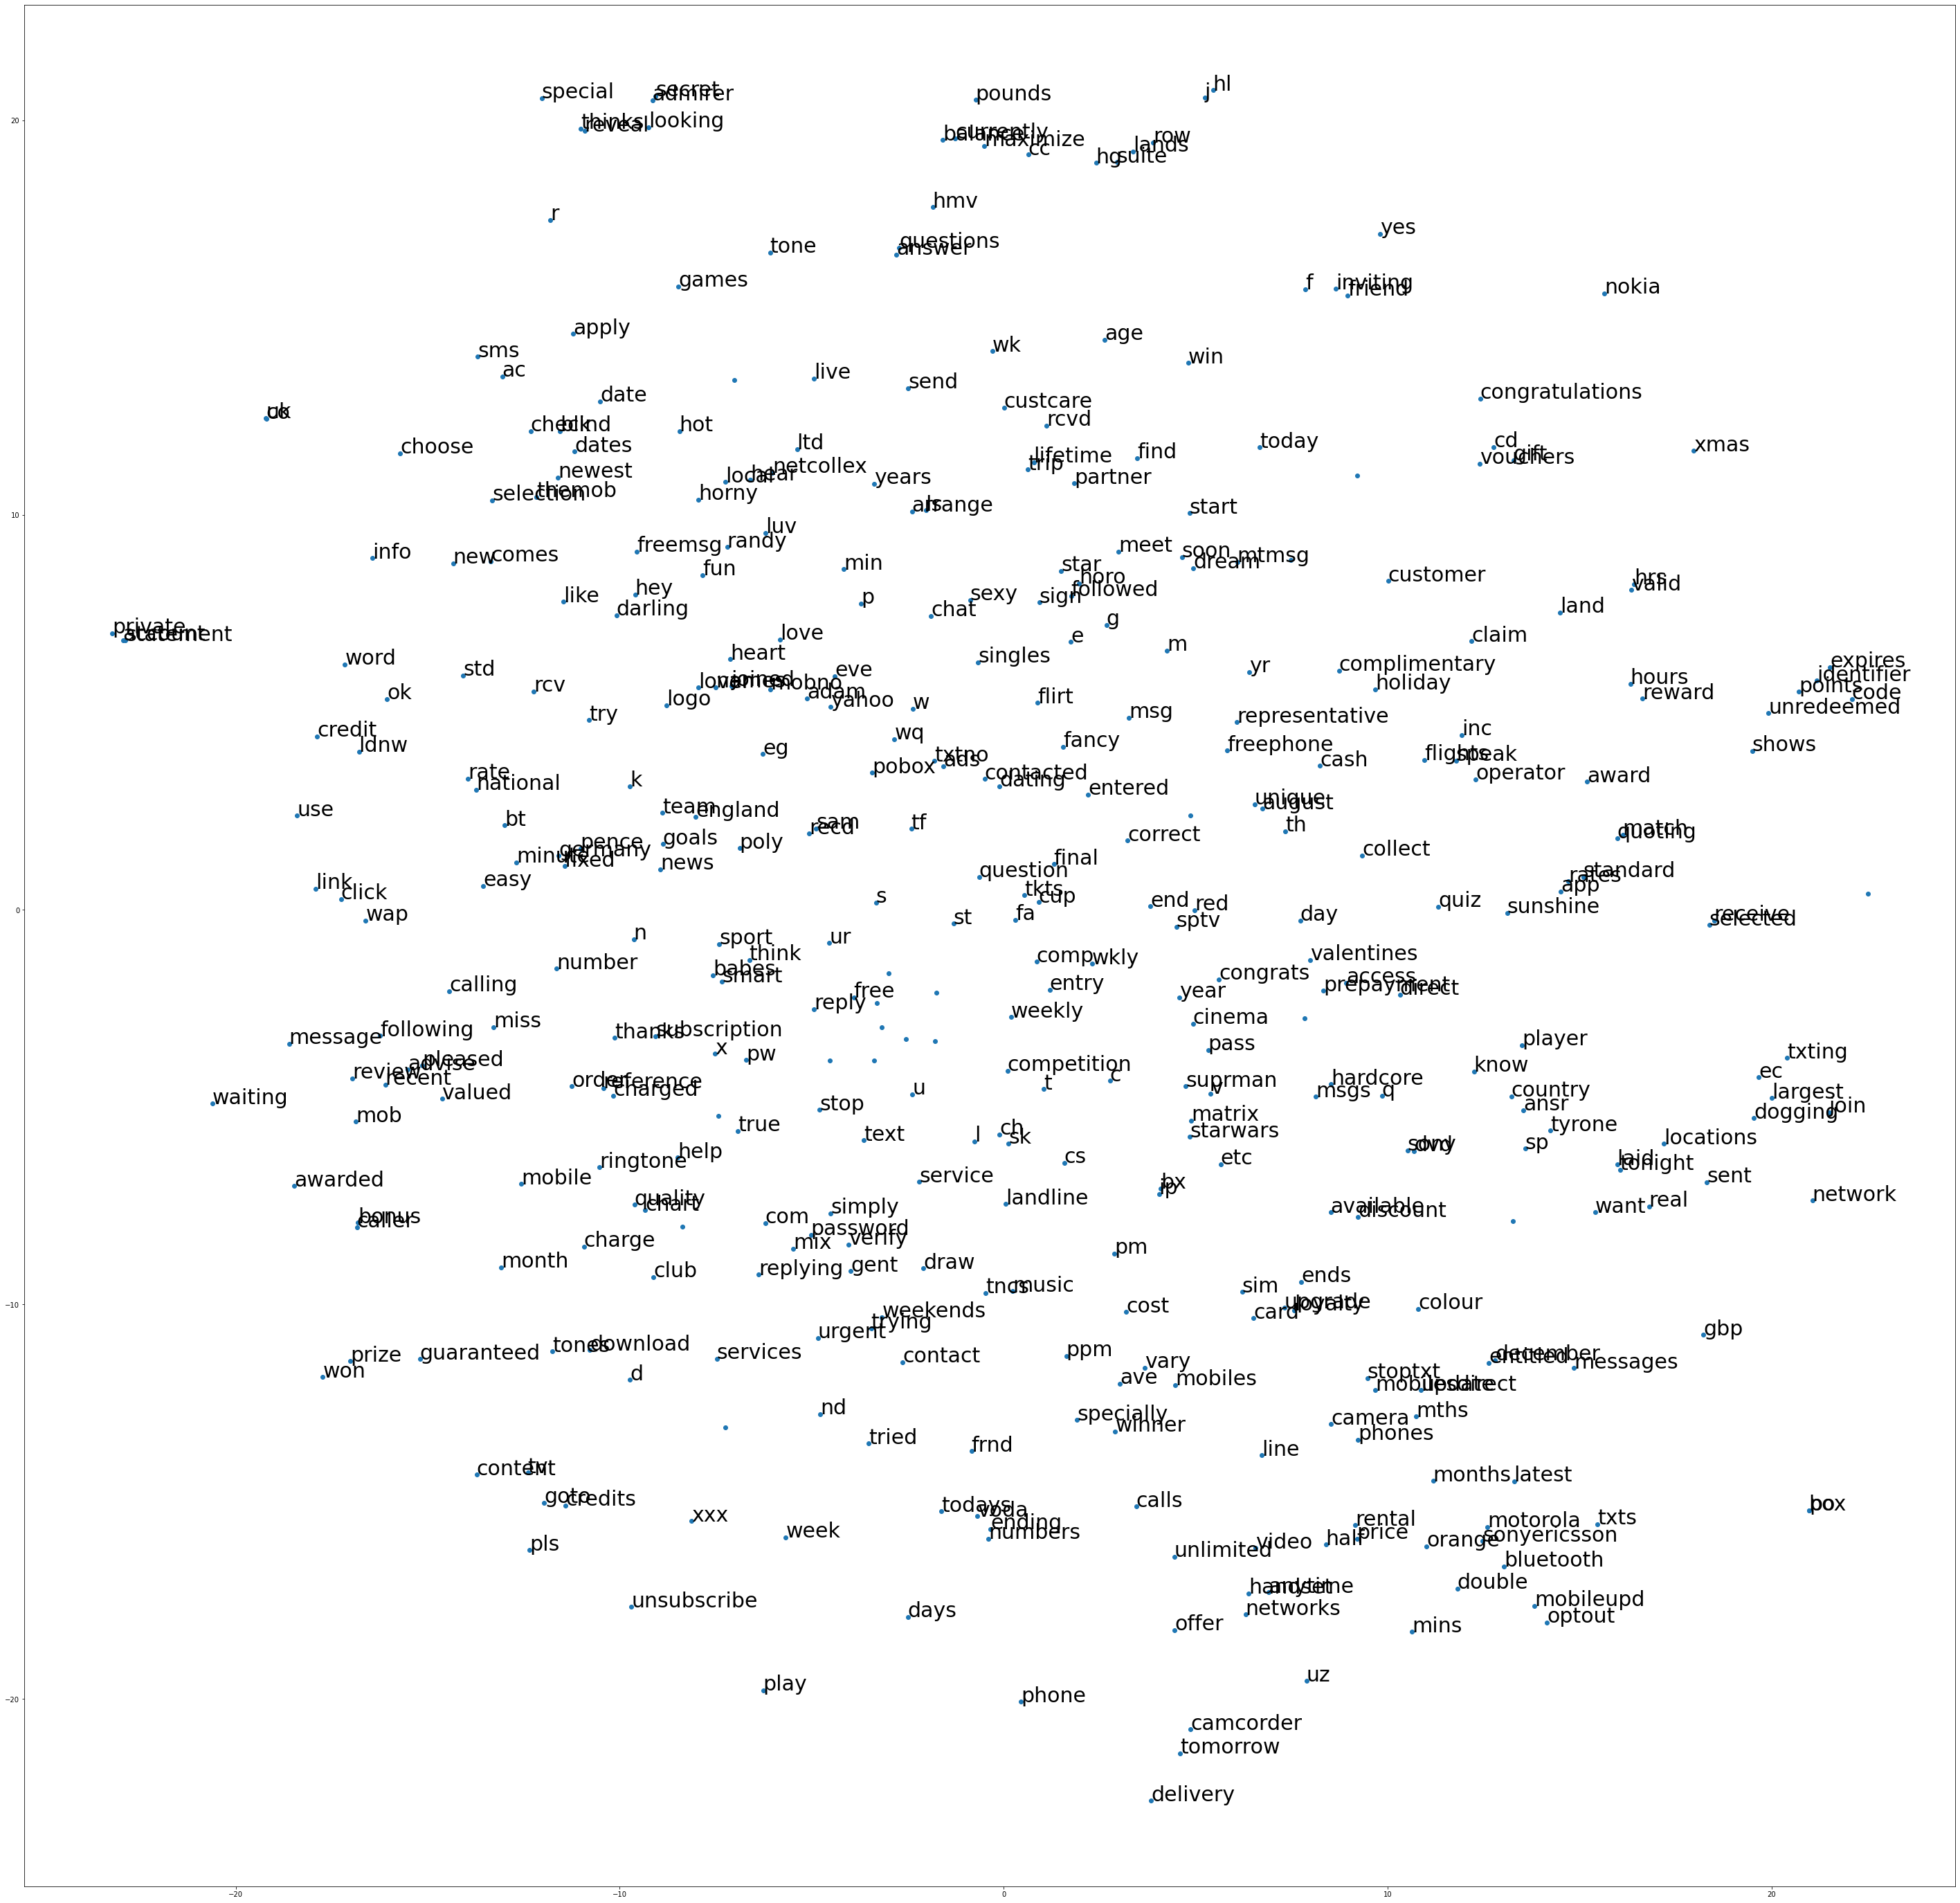

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(50, 50)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

- spam의 가장 빈도수가 높은 단어인 'free'를 Skip-gram와 C-bow의 model의 차이를 확인했을때, skip-gram은 'contract'와 'deliveredtomorrow'와 같은 상업적인 내용이 많았고 C-Bow는 product과 같은 단어들이 유사하다고 나왔다.

- ham의 가장 빈도수가 높은 단어인 'ok'를 Skip-gram와 C-bow의 model의 차이를 확인했을때, 두 model 다 일상과 관련된 단어들이 많이 나왔다.

- eda를 확인한 결과 실제로 'unredeemed', 'points', 'expires', 'code'와 같은 관련된 단어들이 모여있는것을 확인할 수 있지만 정확한 단어의 개념을 알기가 어려워 나머지 모여있는 단어들은 실제로 관련된건지 확인하기 어려웠다.

- 실제로 Skip-gram와 C-bow의 model의 성능을 비교하는게 쉽지는 않았다. 두 model 각각 유사한 단어가 달랐지만 어떤 model이 더 유사한 단어를 보여주는지는 정확하게 파악하기 힘들었다.

### FastText

- Word2Vec과 유사한 방식이지만, 단어를 n-gram으로 나누어 학습하고 subword information을 고려함.

In [41]:
from gensim.models import FastText

ft_spam_model = FastText([spam_tokens], size = 100, window = 5, min_count = 2,
                        iter = 100)
print(ft_spam_model)

FastText(vocab=945, size=100, alpha=0.025)


In [42]:
ft_spam_model.wv.most_similar('free')

[('movie', 0.7279995083808899),
 ('plus', 0.6531137228012085),
 ('camera', 0.6190011501312256),
 ('colour', 0.6161035299301147),
 ('php', 0.6139076948165894),
 ('sports', 0.6115976572036743),
 ('results', 0.6086591482162476),
 ('freefone', 0.5990375280380249),
 ('flag', 0.5986831784248352),
 ('mobilesdirect', 0.5983400344848633)]

In [43]:
ft_ham_model = FastText([ham_tokens], size = 100, window = 5, min_count = 2,
                        iter = 100)
print(ham_model)

Word2Vec(vocab=2765, size=100, alpha=0.025)


In [44]:
ft_ham_model.wv.most_similar('ok')

[('took', 0.7618156671524048),
 ('book', 0.7541244029998779),
 ('hor', 0.7537393569946289),
 ('wana', 0.7502011060714722),
 ('wanna', 0.7479223012924194),
 ('tok', 0.7467641830444336),
 ('hook', 0.7452640533447266),
 ('wan', 0.7396548986434937),
 ('home', 0.7247934937477112),
 ('yar', 0.715175449848175)]

- FastText도 Word2Vec이랑 비슷한 양상을 보이고 있다.
- spam에서 가장 빈도수가 높은 단어인 'free'는 주로 상업적인 단어와 점수가 높았고 ham에서는 가장 빈도수 높은 단어인 'ok'는 주로 일상적인 단어와 점수가 높았다.

#### Wordcloud

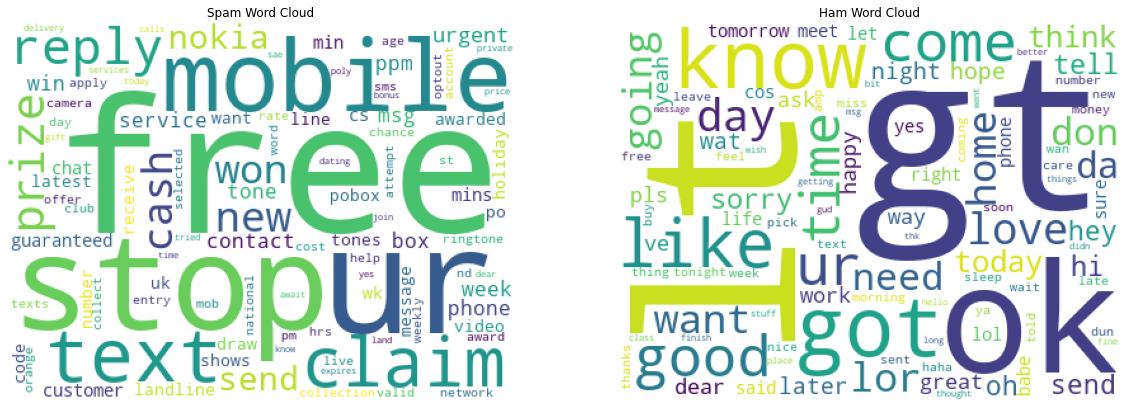

In [55]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', max_words = 100, width = 400, 
              height = 300)

plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
plt.title('Spam Word Cloud')
count_dic = dict(zip(frequency_spam['token'], frequency_spam['frequency']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1, 2, 2)
plt.title('Ham Word Cloud')
count_dic = dict(zip(frequency_ham['token'], frequency_ham['frequency']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

##### Wordcloud
- 시각적으로 알아볼 수 있음.

Spam

- free, mobile, prize, cash등 상업적인 내용이 많음.

Ham

- lt, gt, know, ok, come등 일상적인 내용이 많음.

### Modeling - SVC

- Tf-Idf를 이용하여 vector로 변환
- SVC를 이용

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

vectorizer = TfidfVectorizer('english')

spam_token = list(spam['lemmatizing'])

spam_vector = []
for i in spam_token:
    sentence = ""
    for j in i:
        sentence = sentence + j + " "
    spam_vector.append(sentence)

vector = vectorizer.fit_transform(spam_vector)

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [46]:
len(spam_vector)

5168

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(vector, spam['v1'], test_size = 0.2,
                                                   random_state = 111)
svc = SVC(kernel = 'rbf', gamma = 1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test, prediction)

0.9738878143133463

- 0.97이라는 좋은 score가 나왔다.

### Modeling - Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
prediction = lr_clf.predict(X_test)
accuracy_score(y_test, prediction)

0.9555125725338491